In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

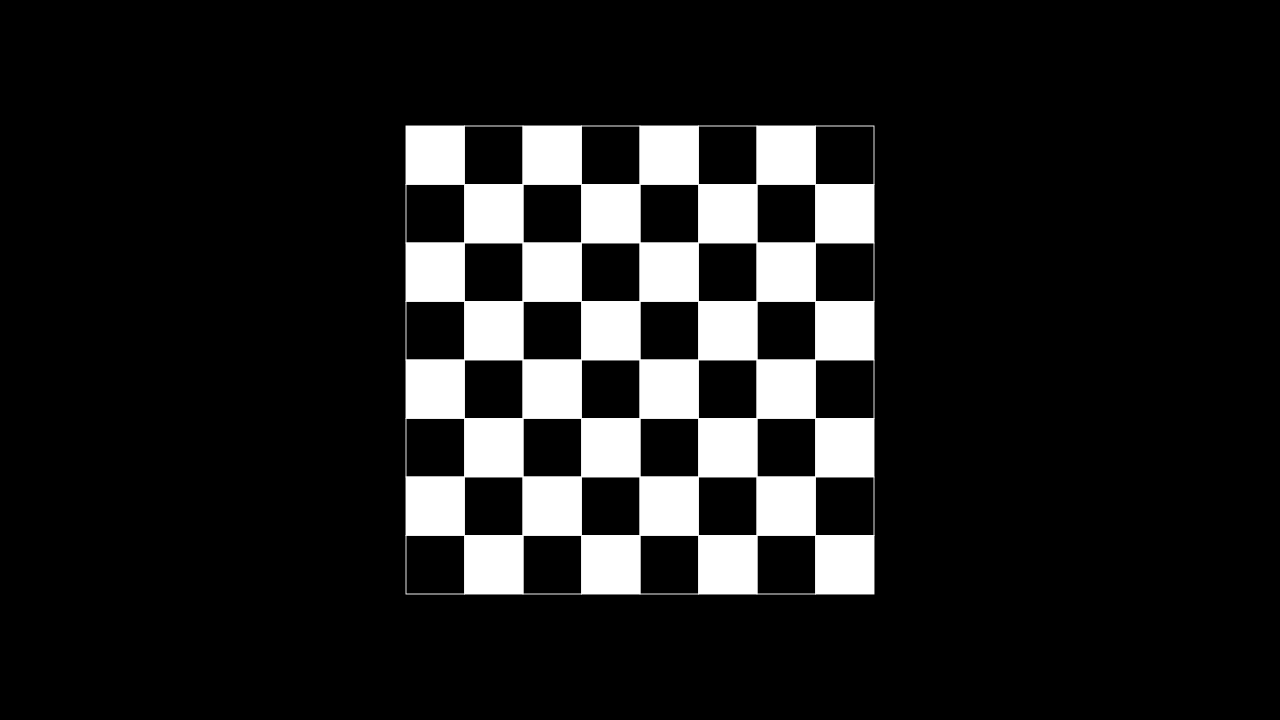

In [3]:
%%manim -qm -v WARNING Chess

class Chess(Scene):
    def construct(self):
        from itertools import cycle
        colors = cycle([WHITE,BLACK])
        LENGTH = 8

        board = VGroup(*[
            VGroup(*[
                Square(fill_color=next(colors),fill_opacity=1,stroke_width=1)
                    .set(height=0.5)
                for _ in range(LENGTH)
            ]).arrange(RIGHT if i%2 == 0 else LEFT,buff=0)
            for i in range(LENGTH)
        ]).arrange(DOWN,buff=0)
        board.scale(1.3)

        self.add(board)

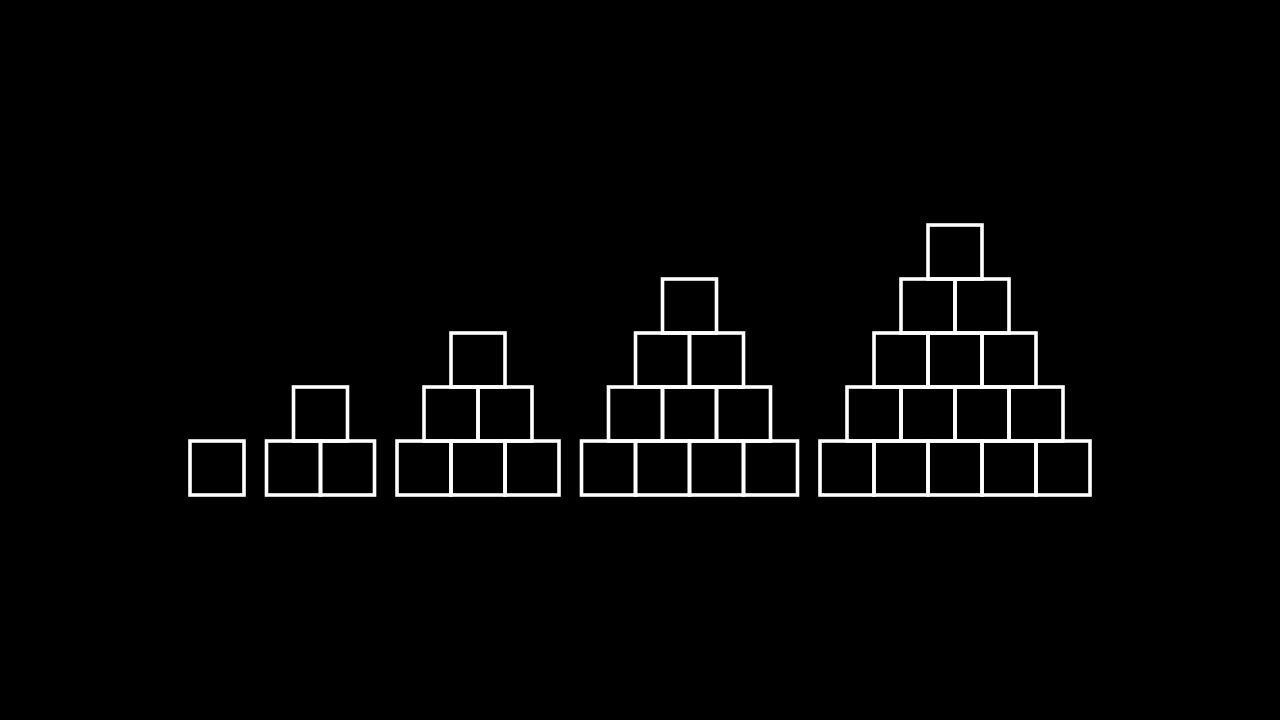

In [4]:
%%manim -qm -v WARNING Pyramid

class Pyramid(Scene):
    def get_pyramid(self, n):
        return VGroup(*[
            VGroup(*[
                Square(side_length=0.6)
                for _ in range(i)
            ]).arrange(RIGHT,buff=0)
            for i in range(n)
        ]).arrange(DOWN,buff=0)

    def construct(self):
        pyramids = VGroup(*[
            self.get_pyramid(n)
            for n in range(1,7)
        ]).arrange(RIGHT,aligned_edge=DOWN)

        self.add(pyramids)

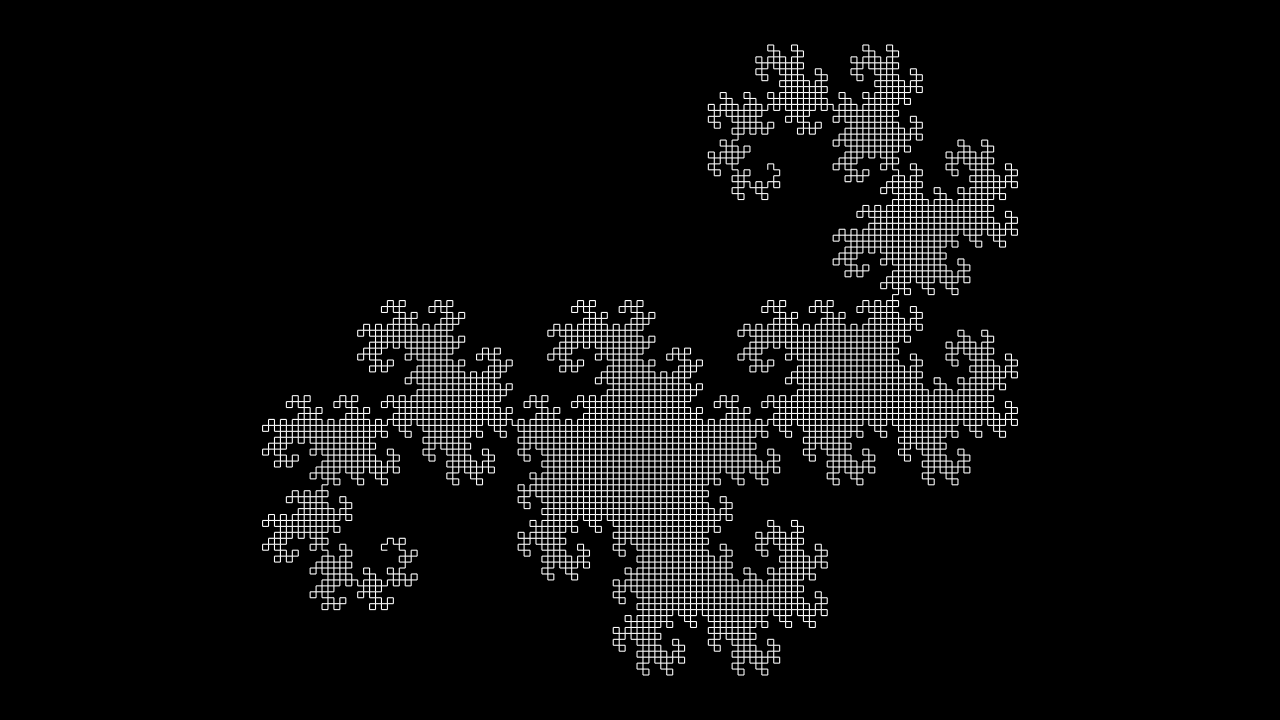

In [5]:
%%manim -qm -v WARNING Dragon

class Dragon(Scene):
    def construct(self):
        path = VGroup()
        first_line = Line(ORIGIN,UP / 5,stroke_width=1.2)
        path.add(first_line)
        iterations = 13

        for i in range(iterations):
            new_path = path.copy()
            new_path.rotate(
                        90*DEGREES,
                        about_point=path[-1].get_end() if i == 0 else path[-1].get_start()
                    )
            post_path = reversed([*new_path])
            path.add(*post_path)

        path.set(height=config.frame_height-1)
        path.move_to(ORIGIN)
        
        self.add(path)

In [6]:
%%manim -qm -v WARNING Ex1

class Ex1(Scene):
    def construct(self):
        s = Square()
        r = Rectangle()
        c = Circle()
        t = Triangle().shift(DOWN)

        grp = VGroup(s,r,c)
        grp.arrange(RIGHT)

        self.add(grp)

        grp.add(t)

        self.remove(c,r)
        self.wait()

        self.play(grp.animate.shift(UP))
        self.wait()

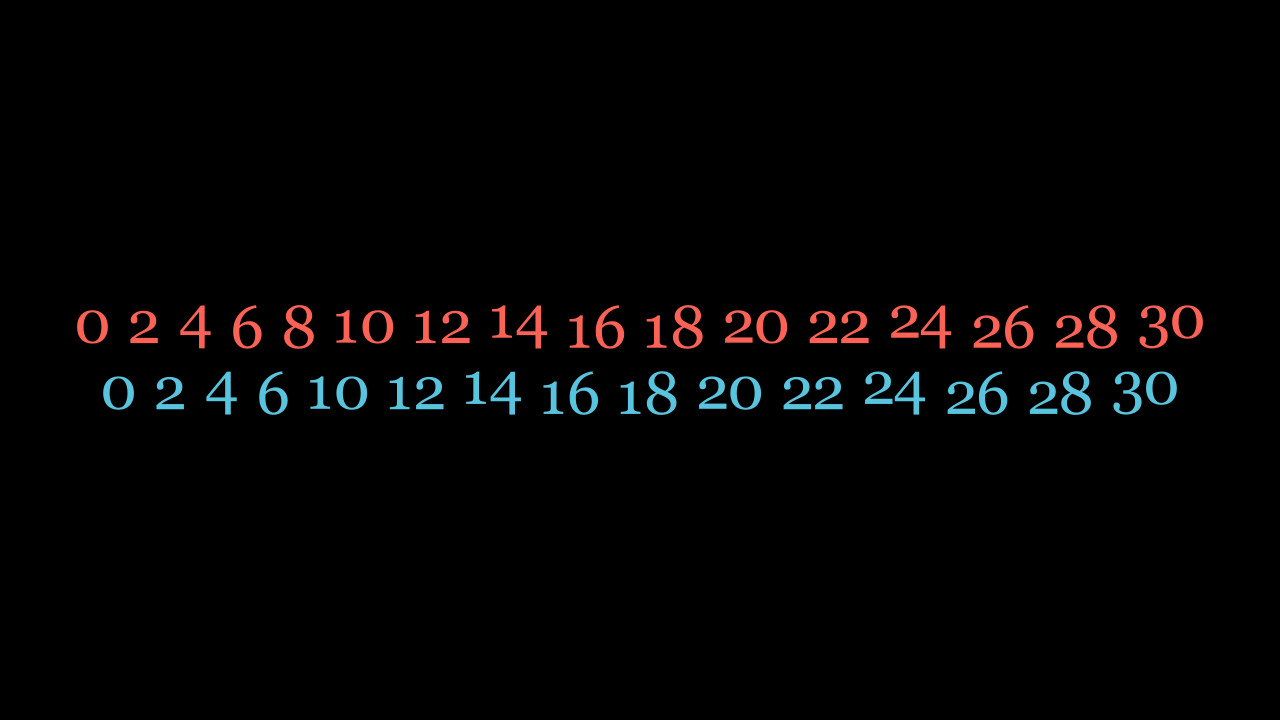

In [7]:
%%manim -qm -v WARNING Ex2

class Ex2(Scene):
    def construct(self):
        # Traditional method
        grp1 = VGroup()
        for i in range(31):
            if i % 2 == 0:
                grp1.add(Text(str(i))) 
        grp1.arrange(RIGHT).set_color(RED)

        # list comprehensions
        grp2 = VGroup(*[
            Text(str(i))
            for i in range(31)
            if i % 2 == 0 and i != 8
        ])
        grp2.arrange(RIGHT).set_color(BLUE)

        VGroup(grp1,grp2).arrange(DOWN)

        self.add(grp1,grp2)

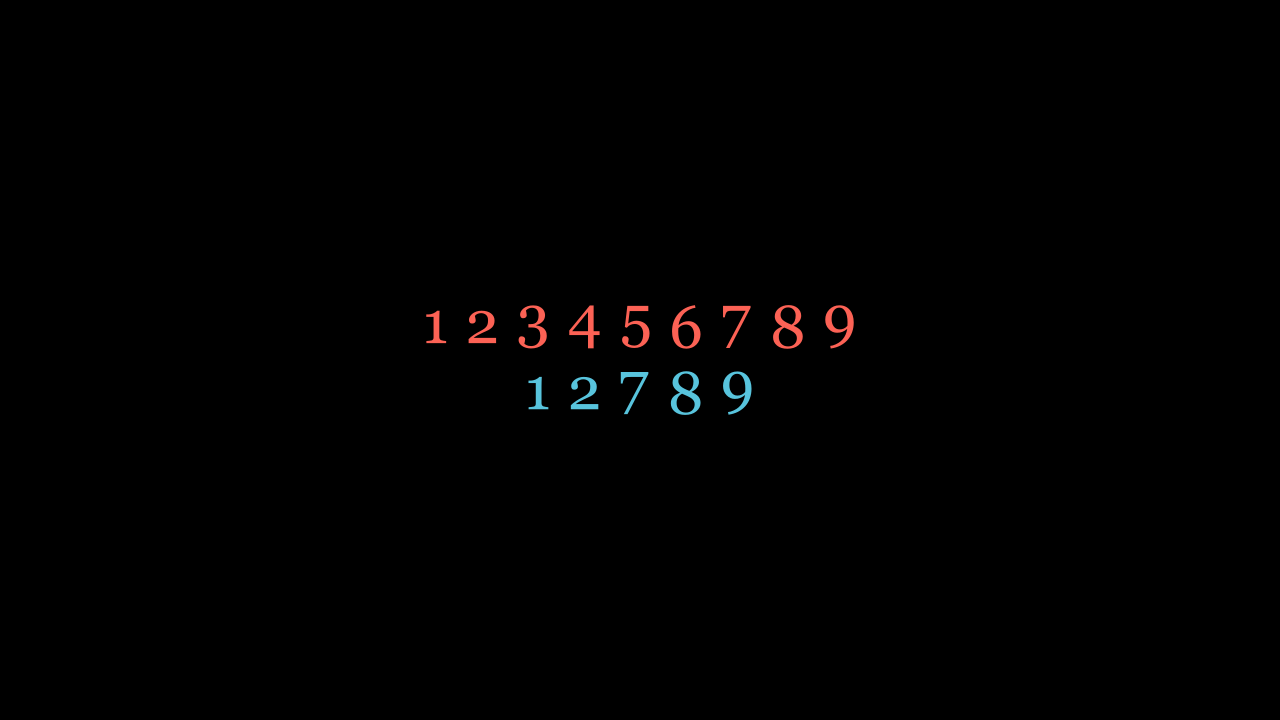

In [8]:
%%manim -qm -v WARNING Ex3

class Ex3(Scene):
    def construct(self):
        vals = [(1,2),(3,4,5),(6,7),(8,9)]
        # 1,2,3,4,5,6,7,8,9

        # Traditional way
        grp1 = VGroup()
        for pair in vals:
            for number in pair:
                grp1.add(Text(str(number)))
        grp1.arrange(RIGHT).set_color(RED)

        # list comprehensions
        grp2 = VGroup(*[
            Text(str(number))
            for pair in vals
            for number in pair
            if number != 6 and len(pair) != 3
        ])
        grp2.arrange(RIGHT).set_color(BLUE)

        VGroup(grp1,grp2).arrange(DOWN)

        self.add(grp1, grp2)

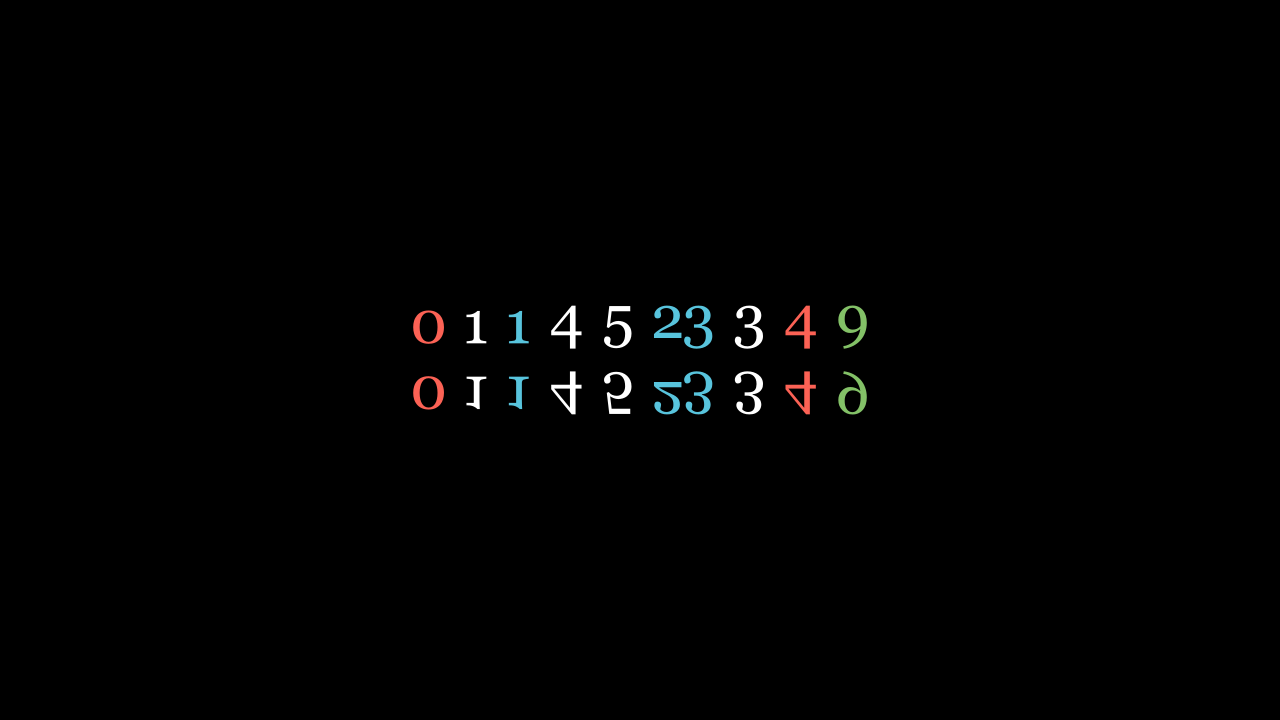

In [9]:
%%manim -qm -v WARNING Ex4

class Ex4(Scene):
    def construct(self):
        # default: white
        # r = red
        # b = blue
        # g = green
        vals = ["r0", 1, "b1", 4, 5, "b23", 3, "r4", "g9"]

        grp1 = VGroup()
        for v in vals:
            if type(v) is int:
                grp1.add(Text(str(v),color=WHITE))
            elif v[0]=="r":
                grp1.add(Text(str(v[1:]),color=RED))
            elif v[0]=="b":
                grp1.add(Text(str(v[1:]),color=BLUE))
            elif v[0]=="g":
                grp1.add(Text(str(v[1:]),color=GREEN))
            else:
                raise ValueError("Color not recognized")
        grp1.arrange(RIGHT)

        grp2 = VGroup(*[
            Text(str(v),color=WHITE)     if type(v) is int else
            Text(str(v[1:]),color=RED)   if v[0]=="r" else
            Text(str(v[1:]),color=BLUE)  if v[0]=="b"else
            Text(str(v[1:]),color=GREEN)
            for v in vals 
        ])
        grp2.arrange(RIGHT)
        grp2.flip(RIGHT)

        VGroup(grp1,grp2).arrange(DOWN)

        self.add(grp1,grp2)
        # vals = ["r0", 1, "b1", 4, 5, "b23", 3, "r4", "g9"]

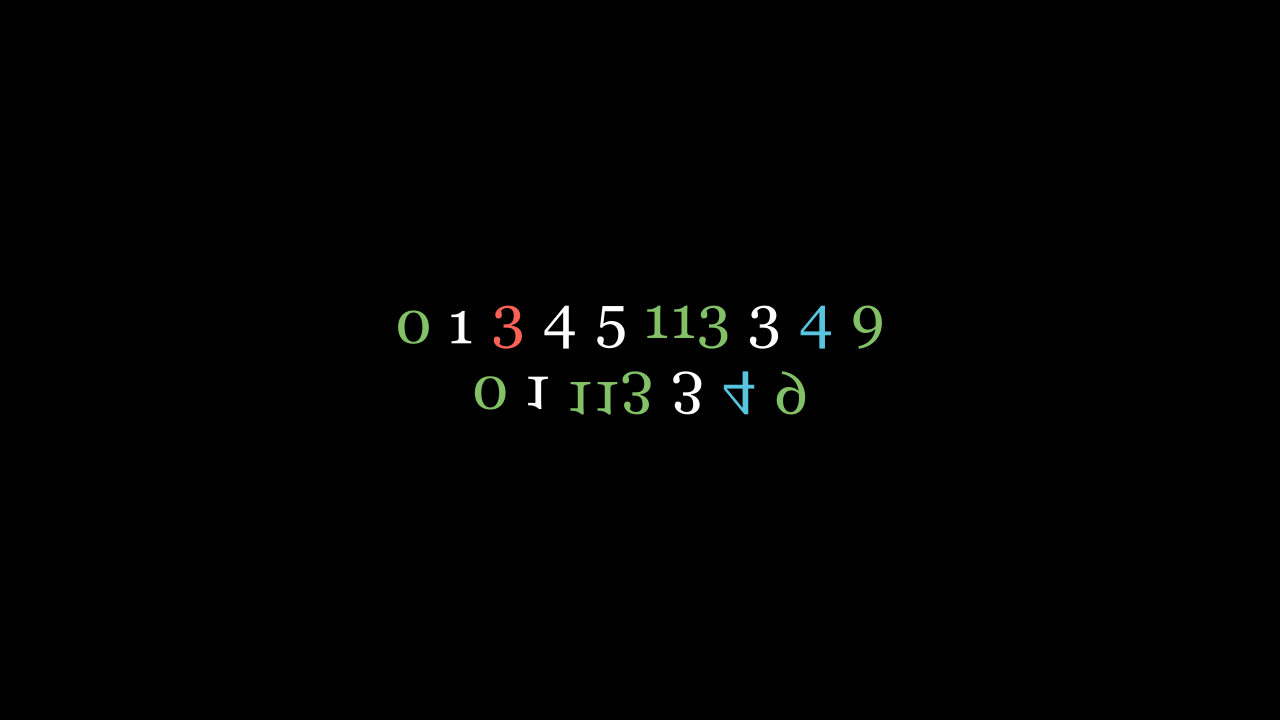

In [10]:
%%manim -qm -v WARNING Ex5

class Ex5(Scene):
    def construct(self):
        # default: white
        # r = red
        # b = blue
        # g = green
        vals = [("g0", 1), ("r3", 4, 5), ("g113", 3), ("b4", "g9")]

        grp1 = VGroup()
        for pair in vals:
            for v in pair:
                if type(v) is int:
                    grp1.add(Text(str(v),color=WHITE))
                elif v[0]=="r":
                    grp1.add(Text(str(v[1:]),color=RED))
                elif v[0]=="b":
                    grp1.add(Text(str(v[1:]),color=BLUE))
                elif v[0]=="g":
                    grp1.add(Text(str(v[1:]),color=GREEN))
                else:
                    raise ValueError("Color not recognized")
        grp1.arrange(RIGHT)

        grp2 = VGroup(*[
            Text(str(v),color=WHITE)     if type(v) is int else
            Text(str(v[1:]),color=RED)   if v[0]=="r" else
            Text(str(v[1:]),color=BLUE)  if v[0]=="b"else
            Text(str(v[1:]),color=GREEN)
            for pair in vals
            for v in pair
            if len(pair) != 3
        ])
        grp2.arrange(RIGHT)
        grp2.flip(RIGHT)

        VGroup(grp1,grp2).arrange(DOWN)

        self.add(grp1,grp2)
        # vals = ["r0", 1, "b1", 4, 5, "b23", 3, "r4", "g9"]

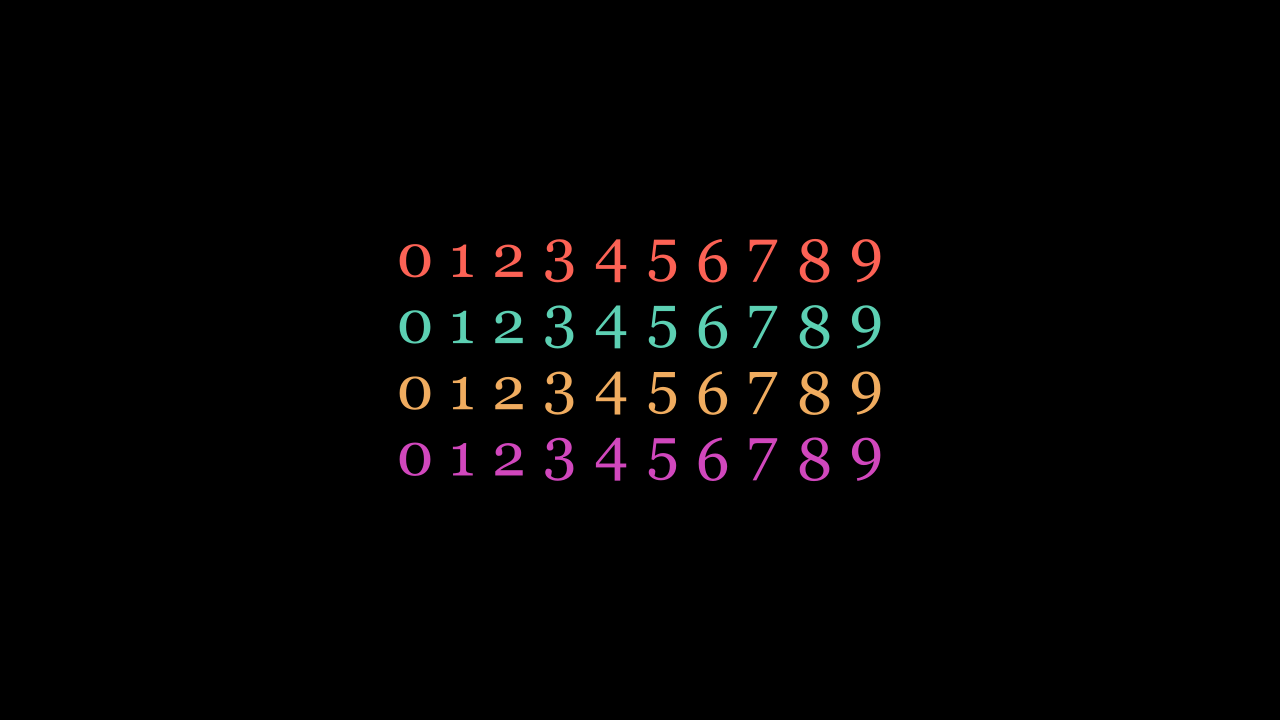

In [11]:
%%manim -qm -v WARNING Ex6

class Ex6(Scene):
    def construct(self):
        colors = [RED, TEAL, GOLD, PINK]

        vals = [*range(10)]

        grp = VGroup(*[
            VGroup(*[Text(str(i),color=color) for i in vals]).arrange(RIGHT)
            for color in colors
        ]).arrange(DOWN)

        self.add(grp)